Import the necessary libraries that will be used in the script. Numpy is a powerful library that has many tools allowing for manipulation of mult-dimensional arrays and matrices. Random is useful for generating random numbers. Matplotlib is a library for plotting. Pandas is a library for data manipulation and modeling. Time will allow for tracking the execution times.

In [9]:
# Import libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from decimal import Decimal

The recursion algorithm below will take in an integer and calculate its factorial. Recursion algorithms work by repeatedly calling a function on itself, which is great for calculating factorials. A factorial is calculated using the formula n*(n-1)*(n-2)...*2*1. Thus, 5! will be 5*4*3*2*1, which is 120. Factorial recursion is caulculated by returning x * the function itself(x - 1). For example, the algorithm will first return 5 * function(4), which will begin the stack, then the next stack will consist of 4 * function(3) until x is 1. This will result in 5*4*3*2*1, which is 120. 

In [2]:
# Begin with the base code for factorial recursion
# as described in chapter 3 of Grokking Algorithms (Bhargava 2016).

def rec_fact(x):
  if x == 1:
    return 1
  else:
    return x * rec_fact(x-1)

The factorial algorithm below using a simple for loop will take an integer and calculate its factorial. It will use a temp variable to store the product of the numbers. For example, finding the factorial of 5 will take 1 * 1 and store it in the temp variable. Then it will take 1 * 2 and store it in the temp variable, then 2 * 3, and so on until the loop reached temp (or 24) * 5. 

In [3]:
# Factorial using simple FOR loop

def for_fact(x):
    temp = 1
    for x in range(1, x + 1):
        temp = temp * x
    return temp

Set a random seed so the results are reproducible. Create a list of 10 random numbers between 100 and 500.

In [4]:
# Set up an array of 10 random numbers between 100 and 500

random.seed(330)

array = random.sample(range(100, 501), 10)

array.sort()

For the 10 random number array, gather the execution time for the simple for loop and recursion algorithm and append it to a list. The time library is used to generate the execution time.

In [5]:
# Execute the recursion and simple for loop for the random number array,
# noting the execution time with each execution.

times_for_loop = []

for i in range(len(array)):
    start = time.clock()
    for_fact(array[i])
    end = time.clock()
    times_for_loop.append((end - start) * 1000)
    
times_recursion = []

for i in range(len(array)):
    start = time.clock()
    rec_fact(array[i])
    end = time.clock()
    times_recursion.append((end - start) * 1000)

Store the factorials of the 10 random numbers in a list. Convert the factorial into scientific notation so it doesn't run into any runtime errors resulting from the int being too large. These factorials will consist of hundreds of digits, which is too large to store in a data frame within Python. 

In [10]:
factorial = []

for i in range(len(array)):
    factorial.append("{:.10e}".format(Decimal(for_fact(array[i]))))

Store the difference in time between the recursion algorithm and the simple for loop. 

In [11]:
times_diff = np.array(times_recursion) - np.array(times_for_loop)

Create a dataframe with the indicating the 10 random numbers, the the execution time in milliseconds for the simple for loop, the execution time in milliseconds for the recursion algorithm, and the difference in execution times between the recursive algorithm and the simple for loop. Display the data frame.

In [12]:
df = pd.DataFrame(list(zip(array, times_recursion, times_for_loop, times_diff, factorial)),
              columns=['Numbers', 'Recursion Time', 'For Loop Time', 'Difference in Time', 'Factorial'])

df

,Numbers,Recursion Time,For Loop Time,Difference in Time,Factorial
0,108,0.080,0.025,0.055,1.3246418195e+174
1,125,0.054,0.020,0.034,1.8826771769e+209
2,136,0.049,0.021,0.028,3.6590428820e+232
3,270,0.222,0.049,0.173,6.6621141047e+540
4,272,0.121,0.077,0.044,4.9107775488e+545
5,305,0.159,0.069,0.090,7.8161436727e+626
6,362,0.527,0.089,0.438,5.2052821972e+770
7,387,0.254,0.097,0.157,1.1620314968e+835
8,415,0.229,0.095,0.134,9.2459456436e+907
9,416,0.304,0.086,0.218,3.8463133877e+910


Use matplotlib to plot the 10 random numbers against the execution time in milliseconds for the recursion algorithm and the simple for loop. The 10 random numbers should be on the horizontal axis, with the time in milliseconds it took to execute the recursion algorithm and the simple for loop. It appears from the plot below that the simple for loop performs faster than the recursive algorithm. It is apparent that the gap between the recursion algorithm and simple for loop widens as the number of the factorial being calculated becomes larger. For example, it took the simple for loop only 0.11 milliseconds to calculate the factorial of the largest random number but 0.244 milliseconds for the recursion algorithm. This demonstrates that while recursion may result in cleaner and more elegent code, as well as shorter code, it does not always perfomr better. A simple for loop, which can sometimes appear to be "dirty", especially relative to recursive code, can perform better than recursion. 

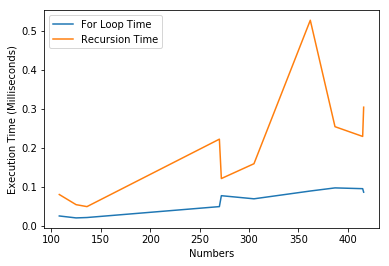

In [13]:
ax = plt.gca()

df.plot(x='Numbers',y='For Loop Time',ax=ax)
df.plot(x='Numbers',y='Recursion Time', ax=ax)
plt.xlabel('Numbers')
plt.ylabel('Execution Time (Milliseconds)')

plt.show()